<a href="https://colab.research.google.com/github/sapto-nugroho/PCD/blob/main/PCD_Assignment02/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama : Sapto Nugroho

##NIU : 565712

##

Implementing following program from scratch

1. Convolution Function

2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for

3. Sharpening with blurring operation

4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.

Create your notebook with name as "PCD_Assignment02" and upload to GitHub. You need to provide your GitHub's code link to the text editor in submission form.

## Import

In [282]:
!ls
!git clone https://github.com/sapto-nugroho/PCD.git
!ls

PCD  sample_data
fatal: destination path 'PCD' already exists and is not an empty directory.
PCD  sample_data


In [283]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, img_as_float
import cv2
import copy

## function==============================================================================================================

### Kernel

#### Custom Kernel
$Sebarang\ matriks\ berbentuk\ berikut:$

$ K̇\begin{bmatrix}
c_{1,1} & c_{1,2} & \dots & c_{1,n} \\
c_{2,1} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & c_{n-1,n} \\
c_{n,1} & \dots & c_{n,n-1} & c_{n,n}
\end{bmatrix}$

In [ ]:
kernel_identitas = np.array([[0,0,0],[0,1,0],[0,0,0]]) #kernel identitas, konvolusi dengan citra menghasilkan citra itu sendiri

kernel_avg3x3 = np.array([[1,1,1],[1,1,1],[1,1,1]])*(1/9) #kernel averaging ukuran 3x3 atau averaging filter untuk smoothing/blurring

kernel_shiftL = np.array([[0,0,0],[1,0,0],[0,0,0]]) #kernel shift, menggeser citra
kernel_shiftR = np.array([[0,0,0],[0,0,1],[0,0,0]]) #kernel shift, menggeser citra
kernel_shiftD = np.array([[0,1,0],[0,0,0],[0,0,0]]) #kernel shift, menggeser citra
kernel_shiftU = np.array([[0,0,0],[0,0,0],[1,0,0]]) #kernel shift, menggeser citra


#### Averaging Kernel (Smoothing Kernel)

$M_{N\times N} \ adalah \ matriks \ kernel \ averaging  $

$M_{N\times N} = \frac{1}{\sum_{i=1}^{n} \sum_{j=1}^{n} c_{i,j}} \begin{bmatrix}
c_{1,1} & c_{1,2} & \dots & c_{1,n} \\
c_{2,1} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & c_{n-1,n} \\
c_{n,1} & \dots & c_{n,n-1} & c_{n,n}
\end{bmatrix};\ c_{i,j}=1,\ ∀i,j \in N=\{1,2,3,...,n\}$


In [ ]:
#membuat averaging kernel (smoothing kernel) ukuran nxn
def avg_kernel(size):
  kernel = np.ones((size, size), dtype=float) / (size * size)
  # kernel = np.ones((size, size), dtype=int) / (size * size)
  return kernel

#### Gaussian Kernel

$Matriks\ kernel\ berisi\ nilai\ yang\ terdistribusi\ secara\ normal \\
 dengan\ pusat\ distribusi\ pada\ elemen\ indeks\ (0,0)\ dan\ K\ suatu\ konstanta  $

$ K̇\begin{bmatrix}
e^{-\frac{(-n/2)^2+(n/2)^2}{2\sigma^2}} &  & \dots & e^{-\frac{0^2+(n/2)^2}{2\sigma^2}} & \dots & & e^{-\frac{(n/2)^2+(n/2)^2}{2\sigma^2}} \\
\vdots &  & \ddots & \vdots & .^{.^{.}} & & \vdots  \\
 &  & e^{-\frac{(-1)^2+1^2}{2\sigma^2}} & e^{-\frac{0^2+1^2}{2\sigma^2}} & e^{-\frac{1^2+1^2}{2\sigma^2}} & & \vdots  \\
e^{-\frac{(-n/2)^2+0^2}{2\sigma^2}} & \dots & e^{-\frac{(-1)^2+0^2}{2\sigma^2}} & e^{-\frac{0^2+0^2}{2\sigma^2}} & e^{-\frac{1^2+0^2}{2\sigma^2}} & \dots & e^{-\frac{(n/2)^2+0^2}{2\sigma^2}} \\
 & & e^{-\frac{(-1)^2+(-1)^2}{2\sigma^2}} & e^{-\frac{0^2+(-1)^2}{2\sigma^2}} & e^{-\frac{1^2+(-1)^2}{2\sigma^2}} &  & \vdots \\
\vdots & &.^{.^{.}} & \vdots & \ddots &  & \vdots \\
e^{-\frac{(-n/2)^2+(-n/2)^2}{2\sigma^2}} &  & \dots & e^{-\frac{0^2+(-n/2)^2}{2\sigma^2}} & \dots &  & e^{-\frac{(n/2)^2+(-n/2)^2}{2\sigma^2}}
\end{bmatrix}$

In [ ]:
def gaussian_kernel(size, sigma, muu):
  # X, Y  grid f kernel size
  X, Y = np.meshgrid(np.linspace(-1, 1, size),
                      np.linspace(-1, 1, size))
  jarakXY = np.sqrt((X**2) + (Y**2))

  K = 1
  gauss = np.exp(-((jarakXY - muu)**2 / (2.0 * sigma**2)))*K

  normal_constant = 1/(np.sum(gauss))
  # print(np.sum(gauss))
  # print(gauss)

  for i in range(gauss.shape[0]):
    for j in range(gauss.shape[1]):
      # print(gauss[i,j],np.sum(gauss))
      gauss[i][j] = gauss[i][j]*normal_constant

  return gauss
  # return gauss, normal_constant

# gaussian = gaussian_kernel(3,1,0)
# print(gaussian[0])
# print(gaussian[0]*gaussian[1])

#### Sharpening Kernel (Sharpening with blurring operation)

$\begin{align*}
F + α(F-F*H) &= F*I + α(F*I - F*H) \\
             &= F + αF(I - H) \\
             &= F*( I + α(I - H)) \\
             &= F*( I + αI - αH) \\
             &= F*((1+\alpha)I - \alpha H) \\
             &= F*H_{baru}
\end{align*}$

$keterangan:$

$\begin{align*}
  F &= matriks\, citra\, ; \\  
  α &=skalar\, ; \\
  I_{n\times n} &= a_{ij} \begin{cases} \mbox{1,} & \mbox{jika }\, i=j=⌈n/2⌉ \\ \mbox{0,} & \mbox{lainnya } \end{cases}\, ; \\  
  H &= matriks\, kernel\, blurring\, ; \\
  H_{baru} &= matriks\, kernel\, sharpening.
\end{align*}$


$\\ $

$Note:\ (F-F*H)\ disebut\ sebagai\ mask$


In [ ]:
def sharpening(alpha,kernel):

  size = kernel.shape[0]
  H = kernel
  I = np.zeros(shape=(size,size),dtype=float)
  I[size//2][size//2] = 1

  # sharperning_kernel = I-H
  sharperning_kernel = (1+alpha)*I - (alpha*H)
  # print(sharperning_kernel)

  return sharperning_kernel

#### Laplacian Kernel

$Kernel\ Laplace$

$ \begin{bmatrix}
0 & 1 & 0  \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix};\ \begin{bmatrix}
1 & 1 & 1  \\
1 & -8 & 1 \\
1 & 1 & 1 \\
\end{bmatrix};\ \begin{bmatrix}
0 & -1 & 0  \\
-1 & 4 & -1 \\
0 & -1 & 0 \\
\end{bmatrix};\ \begin{bmatrix}
-1 & -1 & -1  \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{bmatrix}\ $

$Dibentuk\ persamaan\ :$


$\begin{align*}
 ∇^2f &= \frac{∂^2 f}{∂x^2}+\frac{∂^2 f}{∂y^2} \\
      &= f(x+1,y)+f(x-1,y)-2f(x,y)+f(x,y+1)+f(x,y-1)-2f(x,y) \\
      &= f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4f(x,y)
\end{align*}$

$   $

$\begin{bmatrix}
0 & f(x,y+1) & 0  \\
f(x-1,y) & f(x,y) & f(x+1,y) \\
0 & f(x,y-1) & 0 \\
\end{bmatrix}$


In [ ]:
laplace1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplace2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

In [ ]:
def sharpening_laplacian(img,a,laplaced):
  output = img - (a*laplaced)
  return output

### fungsi konvolusi

In [ ]:
def konvolusi(img,kernel):

  ksize = kernel.shape[0]
  pad = ksize // 2
  kernel = np.flipud(np.fliplr(kernel))

  # padding
  padded = np.pad(img, pad, mode='constant')

  # hasil konvolusi
  output = np.zeros_like(img)

  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          region = padded[i:i+ksize, j:j+ksize]
          output[i, j] = np.sum(region * kernel)

  return output

In [ ]:
def konvolusi_3channel(img,kernel):

  ksize = kernel.shape[0]
  pad = ksize // 2
  kernel = np.flipud(np.fliplr(kernel))

  output = np.zeros_like(img, dtype=float)
  # output = np.zeros_like(img, dtype=int)
  # output = np.zeros_like(img)

  for c in range(3):
      padded = np.pad(img[:,:,c], pad, mode='constant')
      for i in range(img.shape[0]):      # baris
          for j in range(img.shape[1]):  # kolom
              region = padded[i:i+ksize, j:j+ksize]
              val = float(np.sum(region * kernel))
              # val = int(np.sum(region * kernel))
              # val = np.sum(region * kernel)
              output[i, j, c] = val

  if np.min(output)<0:
    output = np.clip(output,0,1)

  # return output.astype(np.uint8)
  return output

##main=================================================================================================================

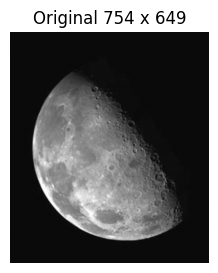

In [ ]:
# img_path = '/content/PCD/PCD_Assignment02/images/4x4colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/images/8x8colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/images/woman01.png'
# img_path = '/content/PCD/PCD_Assignment02/images/pattern.png'
img_path = '/content/PCD/PCD_Assignment02/images/moon.png'

img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img_as_float(img)

# print(img.shape)
# print(img)

plt.figure(figsize=(10,3))
plt.imshow(img, cmap='gray')
plt.title(f"Original {img.shape[0]} x {img.shape[1]}")
plt.axis("off")

plt.show()

In [ ]:
out1 = konvolusi(img, kernel_identitas)
out2 = konvolusi(img, kernel_avg3x3)
out3 = konvolusi(img, kernel_shiftL)
out4 = konvolusi(img, avg_kernel(5))
out5 = konvolusi(img, gaussian_kernel(11,1,0))
out6 = konvolusi(img, sharpening(1,avg_kernel(5)))
out7 = konvolusi(img, sharpening(1,gaussian_kernel(11,1,0)))
out8 = konvolusi(img, laplace1)
out9 = sharpening_laplacian(img, 1, out8)
out10 = konvolusi(img, laplace2)
out11 = sharpening_laplacian(img, 1, out10)

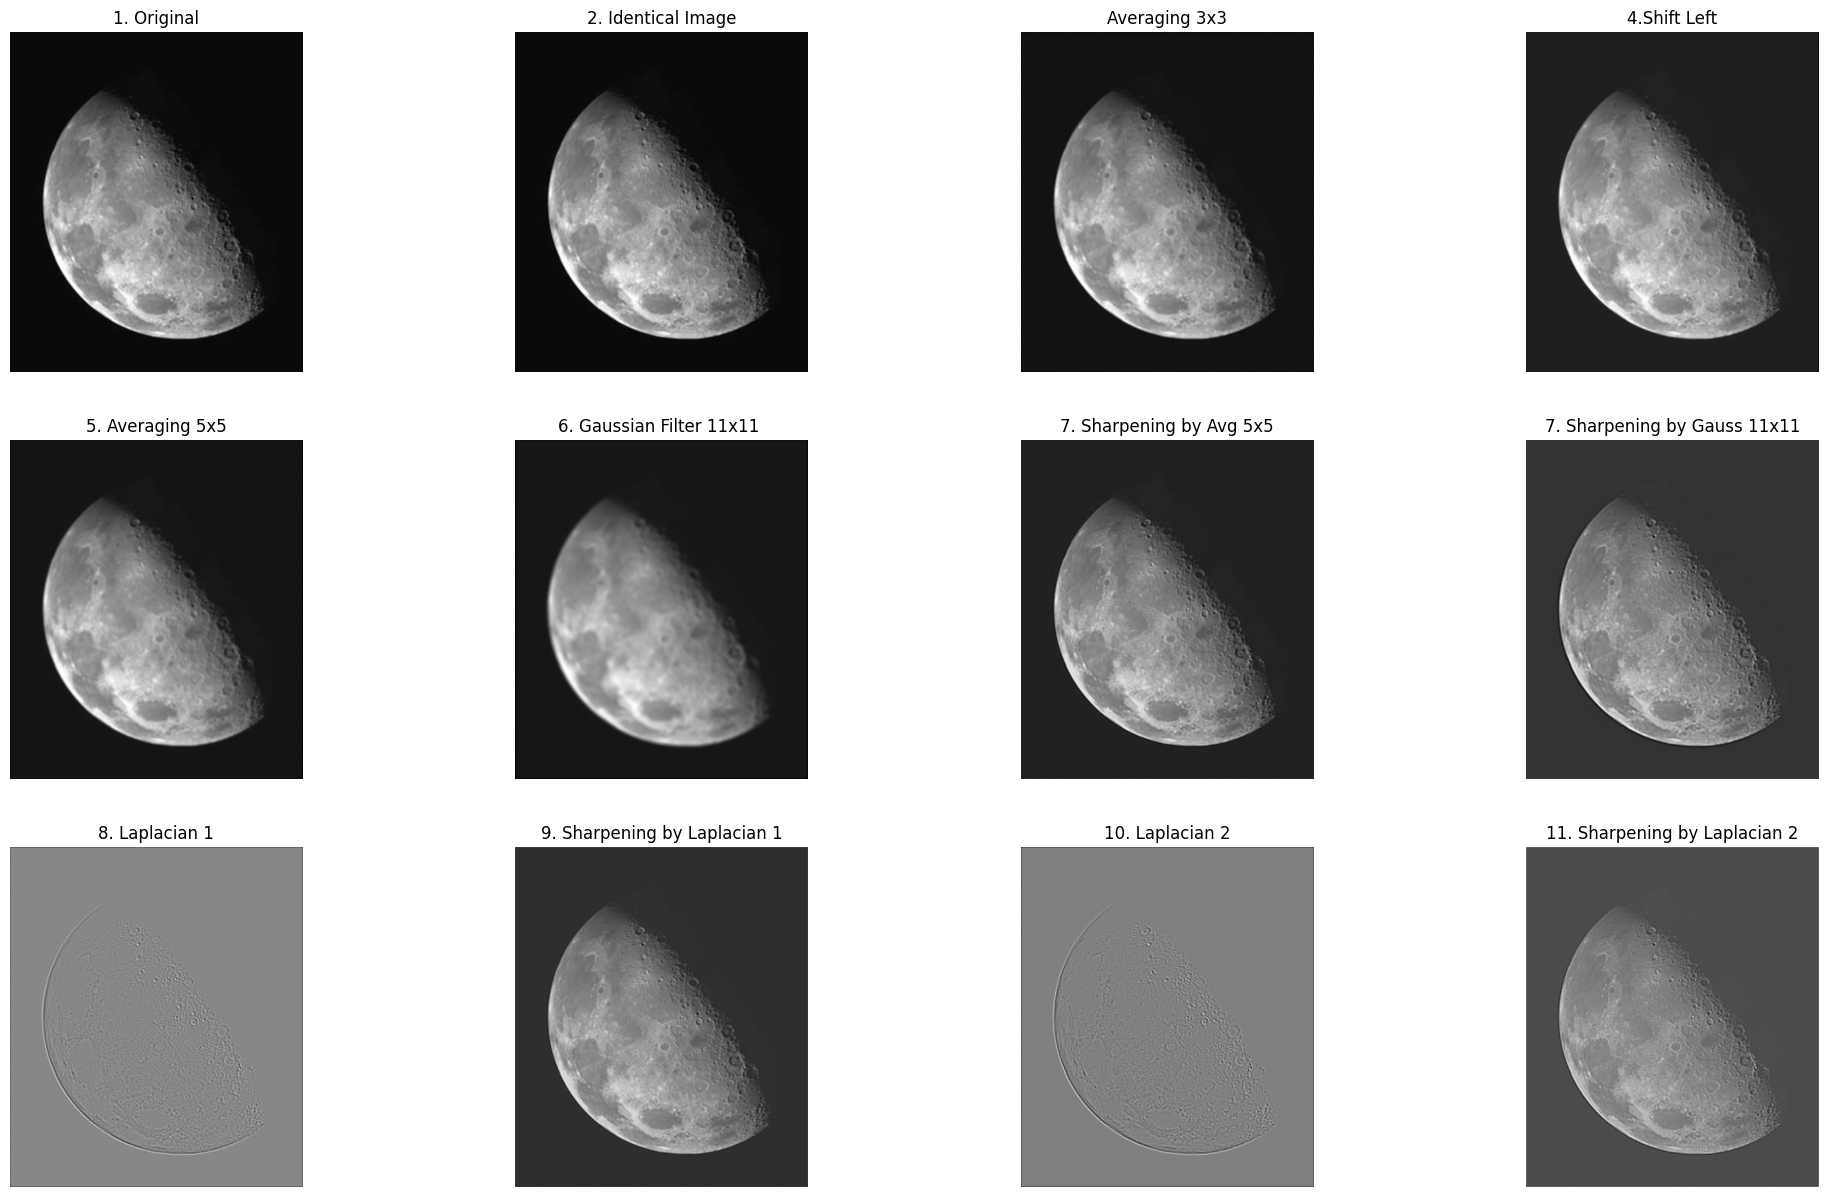

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(25,15))
ax[0,0].imshow(img, cmap='gray'); ax[0,0].set_title("1. Original"); ax[0,0].axis("off")
ax[0,1].imshow(out1, cmap='gray'); ax[0,1].set_title("2. Identical Image"); ax[0,1].axis("off")
ax[0,2].imshow(out2, cmap='gray'); ax[0,2].set_title("Averaging 3x3"); ax[0,2].axis("off")
ax[0,3].imshow(out3, cmap='gray'); ax[0,3].set_title("4.Shift Left"); ax[0,3].axis("off")
ax[1,0].imshow(out4, cmap='gray'); ax[1,0].set_title("5. Averaging 5x5"); ax[1,0].axis("off")
ax[1,1].imshow(out5, cmap='gray'); ax[1,1].set_title("6. Gaussian Filter 11x11 "); ax[1,1].axis("off")
ax[1,2].imshow(out6, cmap='gray'); ax[1,2].set_title("7. Sharpening by Avg 5x5"); ax[1,2].axis("off")
ax[1,3].imshow(out7, cmap='gray'); ax[1,3].set_title("7. Sharpening by Gauss 11x11"); ax[1,3].axis("off")
ax[2,0].imshow(out8, cmap='gray'); ax[2,0].set_title("8. Laplacian 1"); ax[2,0].axis("off")
ax[2,1].imshow(out9, cmap='gray'); ax[2,1].set_title("9. Sharpening by Laplacian 1"); ax[2,1].axis("off")
ax[2,2].imshow(out10, cmap='gray'); ax[2,2].set_title("10. Laplacian 2"); ax[2,2].axis("off")
ax[2,3].imshow(out11, cmap='gray'); ax[2,3].set_title("11. Sharpening by Laplacian 2"); ax[2,3].axis("off")
plt.show()

## Discussion

Analisis filter spasial menunjukkan
